*El siguiente dataset contiene información sobre cursos disponibles en la plataforma Udemy. Cada registro representa un curso y cuenta con información detallada sobre su título, descripción, características y atributos relevantes para los usuarios. Los atributos incluyen información sobre el precio, la cantidad de estudiantes inscritos, la calificación promedio, la cantidad de comentarios y la duración total del contenido del curso. Además, se clasifica cada curso en diferentes áreas temáticas y el idioma en el que se imparten.*

La motivación para analizar este dataset es entender las tendencias en el mercado de la educación en línea y cómo los usuarios están interactuando con los cursos en la plataforma Udemy. Lo cual podría ayudar a identificar áreas de oportunidad para mejorar la oferta de cursos y maximizar los ingresos de la plataforma.
La audiencia que podría estar interesada en este análisis incluye a los propios administradores de la plataforma Udemy, así como a inversores interesados en el mercado de la educación en línea y profesionales de marketing y publicidad en línea. Así como para personas interesadas en tomar cursos en línea y que buscan información sobre qué cursos son más populares. 



Preguntas e hipótesis a abordar:

* ¿Cuáles son las categorías de cursos más populares en la plataforma Udemy? 
Hipótesis nula: La popularidad de las categorías de cursos en la plataforma Udemy es independiente del precio de los cursos.
Hipótesis alternativa: La popularidad de las categorías de cursos en la plataforma Udemy depende del precio de los cursos.


* ¿Cómo se relaciona el precio de los cursos con el número de estudiantes inscritos?
Hipótesis nula: No hay relación significativa entre el precio de los cursos y el número de estudiantes inscritos.
Hipótesis alternativa: Existe una relación significativa entre el precio de los cursos y el número de estudiantes inscritos.


* ¿Cómo varía la popularidad de los cursos en función de su idioma y su categoría temática en Udemy? 
Hipótesis nula: La popularidad de los cursos no varía significativamente en función del idioma y la categoría temática en Udemy.
Hipótesis alternativa: La popularidad de los cursos varía significativamente en función del idioma y la categoría temática en Udemy.



Definición de objetivo, Contexto comercial, Problema Comercial y Contexto analítico:

El objetivo de este proyecto podría ser identificar las características de los cursos más populares y recomendados en cada categoría para mejorar la oferta de cursos en la plataforma.

El contexto comercial es el mercado de educación en línea, donde existen diversas plataformas que ofrecen cursos en línea. El objetivo es ofrecer cursos que se adapten a las necesidades y preferencias de los estudiantes para aumentar su satisfacción frente a la plataforma Udemy.

El problema comercial es el desdeo de la plataforma de mejorar su oferta de cursos para atraer a más estudiantes. Para ello, es importante entender qué características tienen los cursos más populares y recomendados en cada categoría.

Contexto analítico: utilizando los datos disponibles de los cursos en la plataforma, se realizará un análisis exploratorio de las tres categorías más populares (Development, Business y IT & Software) para identificar patrones y tendencias en cuanto a duración, precio y número de lecturas. También se analizará la relación entre estas variables y el número de inscritos para entender cómo estas características afectan al curso. A partir de estos análisis, se podrán identificar las características más importantes para un curso exitoso en cada categoría y así mejorar la oferta de la plataforma Udemy.

# ***EDA (Exploratory Data Analysis)***


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_udemy = pd.read_csv('/content/Course_info.csv') #leemos el archivo csv.
data_udemy.head() 

NameError: ignored

In [ ]:
print(f"Filas: {data_udemy.shape[0]}") #vemos cuantas filas tiene el dataset
print(f"Columnas: {data_udemy.shape[1]}") #vemos cuantas columnas tiene el dataset


In [ ]:
print(data_udemy.dtypes) #vemos que tipos de datos contiene el dataset

In [ ]:
data_udemy.info() #informacion general del dataset

In [ ]:
data_udemy.isna().sum().sort_values(ascending = False) #veo la cantidad de datos nulos. 

In [ ]:
data_udemy.drop(columns = ['last_update_date', 'instructor_url', 'topic'], inplace = True)
data_udemy #elimino las siguientes columnas ya que contienen muchos valores nulos y no van a ser de relevancia para los objetivos de mi analisis.

In [ ]:
print(data_udemy.sort_values('num_subscribers', ascending=False).head(10)) #los 10 cursos mas populares segun numero de inscritos 

In [ ]:
plt.hist(data_udemy['avg_rating'], bins=20) #promedo de calificaciones de los cursos de la plataforma Udemy
plt.show()

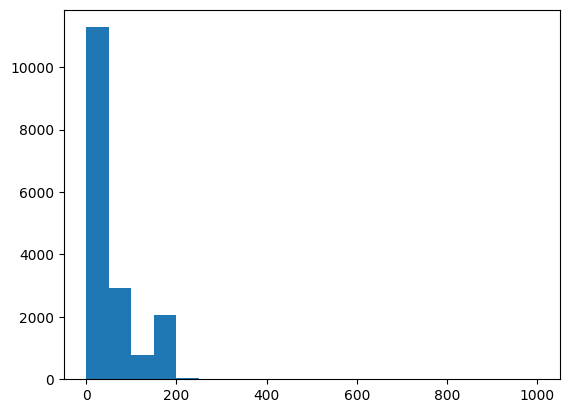

In [ ]:
plt.hist(data_udemy['price'], bins=20) #distribucion de precios de los cursos
plt.show()

# ¿Cuáles son las categorías de cursos más populares en la plataforma Udemy? 

In [ ]:
inscritos_por_categoria = data_udemy.groupby('category')['num_subscribers'].sum()

In [ ]:
inscritos_por_categoria = inscritos_por_categoria.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12,6))
inscritos_por_categoria.plot(kind='bar', color='pink')
plt.title('Categorías de cursos más populares en Udemy')
plt.xlabel('Categorías')
plt.ylabel('Cantidad de estudiantes inscritos')
plt.show()

In [ ]:
num_cursos_por_categoria = data_udemy.groupby('category')['id'].count()
num_cursos_por_categoria = num_cursos_por_categoria.sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(12, 6))
num_cursos_por_categoria.plot(kind='bar', color='pink')
plt.title('Número de cursos publicados por categoría')
plt.xlabel('Categoria')
plt.ylabel('Número de cursos')
plt.show()

Por lo tanto, en ambas visualizaciones podemos observar que la categoría con mayor número de estudiantes inscritos, y mayor número de cursos publicados por categoría es 'Development', seguido de 'Business', y en tercer lugar 'IT & Software'. Esto puede ser de utilidad, tanto para la plataforma, y especialmente para los estudiantes, ya que denota una tendencia de mercado por cierta categoría de cursos. De cierta forma también puede expresar la necesidad y la demanda en los sectores de desarrollo, empresas e IT. 

In [ ]:
categorias = ['Development', 'Business', 'IT & Software'] # Creo un nuevo dataframe con las categorías populares
data_udemy_categorias = data_udemy[data_udemy['category'].isin(categorias)]

In [ ]:
# Medidas estadísticas de interés
media_duracion = data_udemy_categorias.groupby('category')['content_length_min'].mean()
mediana_duracion = data_udemy_categorias.groupby('category')['content_length_min'].median()
desv_estandar_duracion = data_udemy_categorias.groupby('category')['content_length_min'].std()

media_precio = data_udemy_categorias.groupby('category')['price'].mean()
mediana_precio = data_udemy_categorias.groupby('category')['price'].median()
desv_estandarprecio = data_udemy_categorias.groupby('category')['price'].std()

media_lecturas = data_udemy_categorias.groupby('category')['num_lectures'].mean()
mediana_lecturas = data_udemy_categorias.groupby('category')['num_lectures'].median()
desv_estandar_lecturas = data_udemy_categorias.groupby('category')['num_lectures'].std()

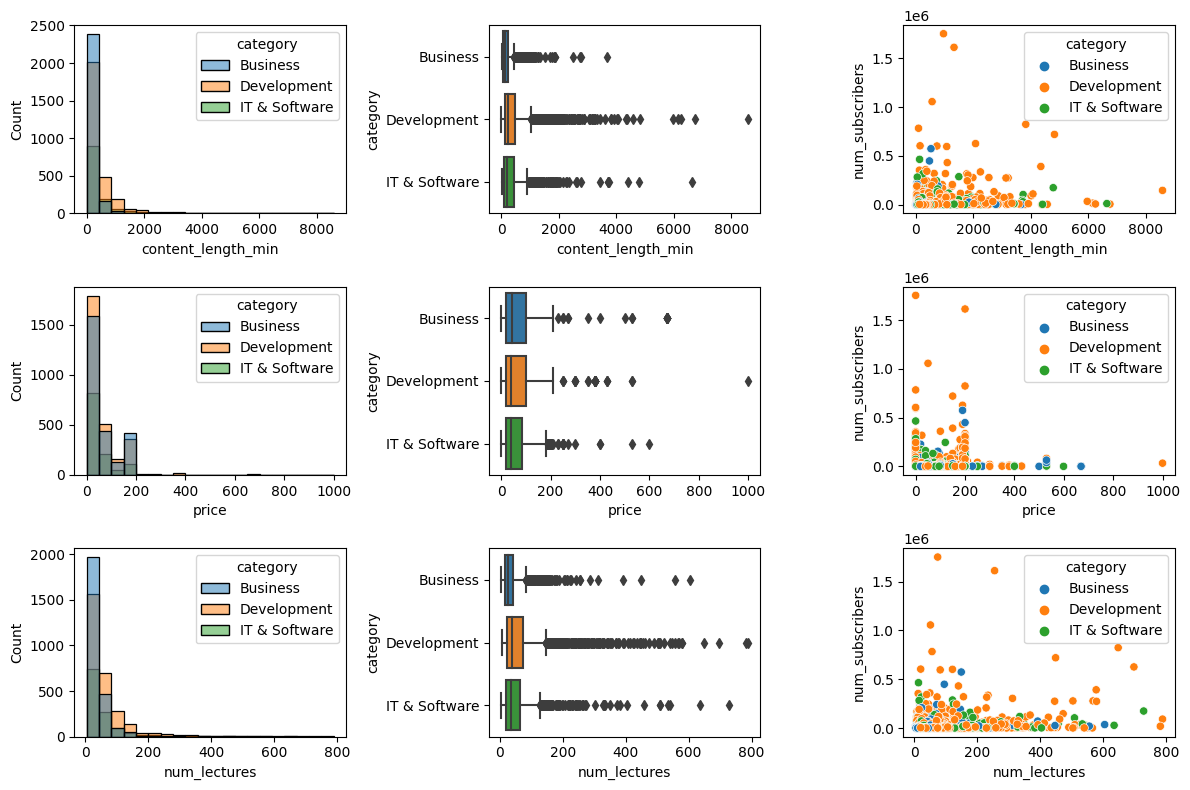

In [ ]:
# Visualizacion de las variables de interés
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

sns.histplot(data=data_udemy_categorias, x='content_length_min', hue='category', bins=20, ax=axs[0, 0])
sns.boxplot(data=data_udemy_categorias, x='content_length_min', y='category', ax=axs[0, 1])
sns.scatterplot(data=data_udemy_categorias, x='content_length_min', y='num_subscribers', hue='category', ax=axs[0, 2])
#tomando en cuenta la duracion de los cursos

sns.histplot(data=data_udemy_categorias, x='price', hue='category', bins=20, ax=axs[1, 0])
sns.boxplot(data=data_udemy_categorias, x='price', y='category', ax=axs[1, 1])
sns.scatterplot(data=data_udemy_categorias, x='price', y='num_subscribers', hue='category', ax=axs[1, 2])
#tomando en cuenta el precio de los cursos 

sns.histplot(data=data_udemy_categorias, x='num_lectures', hue='category', bins=20, ax=axs[2, 0])
sns.boxplot(data=data_udemy_categorias, x='num_lectures', y='category', ax=axs[2, 1])
sns.scatterplot(data=data_udemy_categorias, x='num_lectures', y='num_subscribers', hue='category', ax=axs[2, 2])
#tomando en cuenta la cantidad de lecturas de los cursos

plt.tight_layout()
plt.show()

Tomando en cuenta la duracion de los cursos, vemos una tendencia de que la categoría "Development" tiene una duración promedio de curso más larga en comparación con las categorías "Business" y "IT & Software".
La mayoría de los cursos en las tres categorías tienen una duración de entre 0 y 10 horas. Recordemos que la duración de los cursos esta medida en minutos. En la categoría "Development", podemos observar que hay algunos cursos que tienen una duración muy larga, incluso más de 100 horas. Mientras que, en la categoría "IT & Software", la mayoría de los cursos tienen una duración de entre 0 y 5 horas, igualmente teniendo algunos pocos cursos de hasta 100 horas. En la categoría "Business", la duración promedio de los cursos es la más corta.

En general, los cursos de 'Development' y 'IT & Software' tienden a tener un precio ligeramente más alto en comparación con los cursos de 'Business'. Asímismo el precio de los cursos puede estar influenciado por otros factores, como la duración del curso o la calificación promedio. Por ejemplo, dentro de las tres categorías más populares más "Development" "Business" y "IT & Software" el curso más largo tiene un precio más alto en comparación con los otros dos cursos más cortos. Aunque, también es interesante resaltar que aún 'Business' siendo el curso más corto en duración, el precio del mismo no varía de forma drástica en comparación a los otros dos cursos. 

Podemos observar que, los cursos de la categoría 'Development' tienen, en promedio, un mayor número de lecturas que los cursos de las otras dos categorías. Habiendo algunos cursos que superan las 100 lecturas. También, podemos observar que los cursos de la categoría 'Business' tienen un rango más amplio de número de lecturas que los cursos de las otras dos categorías. Por otra parte, los cursos de la categoría 'IT & Software' tienen un número de lecturas promedio menor que los cursos de la categoría 'Development', pero mayor que los cursos de la categoría 'Business'.


Recomendaciones con base en insights observados:

En cuanto a la categoría 'Business', se observó que hay una gran variabilidad en el número de lecturas, lo que indica que existe una gran diversidad de intereses y necesidades de los estudiantes. Por lo tanto, se recomienda ofrecer cursos de distintas duraciones y precios para cubrir esta gama de intereses. Se debe tener en cuenta que los cursos más populares en esta categoría suelen tener una duración media (entre 5 y 10 horas) y un precio moderado.

# ¿Cómo se relaciona el precio de los cursos con el número de estudiantes inscritos?

In [ ]:
inscritos_x_precio = data_udemy.groupby('price')['num_subscribers'].sum()
inscritos_x_precio = inscritos_x_precio[inscritos_x_precio.index > 0]

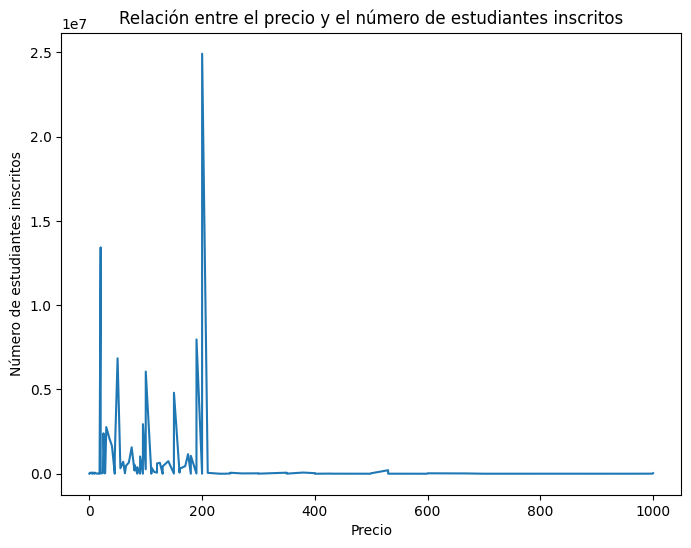

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(inscritos_x_precio.index, inscritos_x_precio.values)
plt.title('Relación entre el precio y el número de estudiantes inscritos')
plt.xlabel('Precio')
plt.ylabel('Número de estudiantes inscritos')
plt.show()

En este caso, observamos que generalmente, el mayor número de inscritos se encuentra en el rango de precios de hasta 200 dólares. Pero particularmente vemos un incremento de inscritos frente a cursos que cuestan entre 200 dólares apróximadamente. Y, habiendo una drástica disminución de inscritos en cursos que cuestan más de 200 dólares, estos datos pueden ser de suma relevancia a la hora de analizar que cursos tienen mayor rentabilidad, y cuál es la sensibilidad de los estudiantes en relación al precio de los cursos. Permitiéndoles a los proveedores de cursos, ajustar sus precios a la demanda actual. 

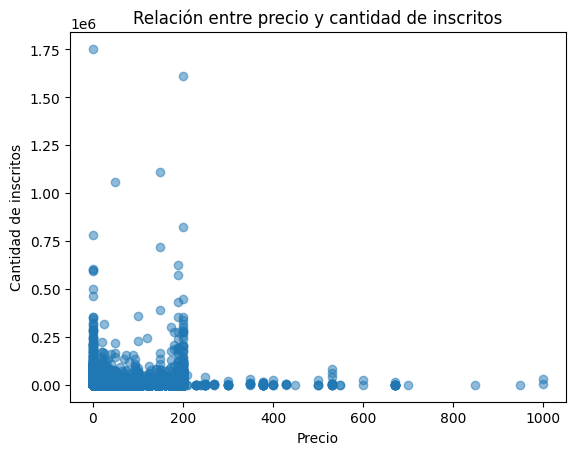

In [ ]:
price = data_udemy["price"]
num_subscribers = data_udemy["num_subscribers"]

plt.scatter(price, num_subscribers, alpha=0.5)
plt.title("Relación entre precio y cantidad de inscritos")
plt.xlabel("Precio")
plt.ylabel("Cantidad de inscritos")
plt.show()

A partir del scatter plot, se puede inferir que no existe una relación lineal fuerte entre el precio y la cantidad de inscritos en los cursos. Ya que, se puede observar que hay cursos con un precio alto pero con una cantidad baja de inscritos y viceversa. Sin embargo, se puede observar una tendencia general de que los cursos más populares (aquellos con mayor cantidad de inscritos) tienden a estar en el rango de precios más bajos, mientras que los cursos menos populares suelen tener precios más altos. 

Basadonos en el análisis de los precios de los cursos, se pueden hacer las siguientes recomendaciones, como el ofrecer una mayor variedad de precios, los cursos de precios bajos y medianos son los más populares, por lo que se recomienda ofrecer una variedad de precios para satisfacer las necesidades y presupuestos de los estudiantes. Así como, ofrecer promociones y descuentos. Ya que los cursos con precios elevados tienen menos inscritos, por lo que se pueden ofrecer promociones y descuentos para incentivar a los estudiantes a inscribirse en estos cursos.

# ¿Cómo varía la popularidad de los cursos en función de su idioma y su categoría temática en Udemy?

In [ ]:
popularidad_segun_idioma_y_categoria = data_udemy.groupby(['language', 'category'])['num_subscribers'].sum()

popularidad_segun_idioma_y_categoria = pd.DataFrame(popularidad_segun_idioma_y_categoria).reset_index()

popularidad_segun_idioma_y_categoria = popularidad_segun_idioma_y_categoria.sort_values('num_subscribers', ascending=False)

In [ ]:
idiomas_populares = popularidad_segun_idioma_y_categoria['language'].unique()[:10]

popularidad_segun_idioma_y_categoria = popularidad_segun_idioma_y_categoria[popularidad_segun_idioma_y_categoria['language'].isin(idiomas_populares)]

categorias_populares = popularidad_segun_idioma_y_categoria['category'].unique()[:10]

popularidad_por_idioma_categoria = popularidad_segun_idioma_y_categoria[popularidad_segun_idioma_y_categoria['category'].isin(categorias_populares)]

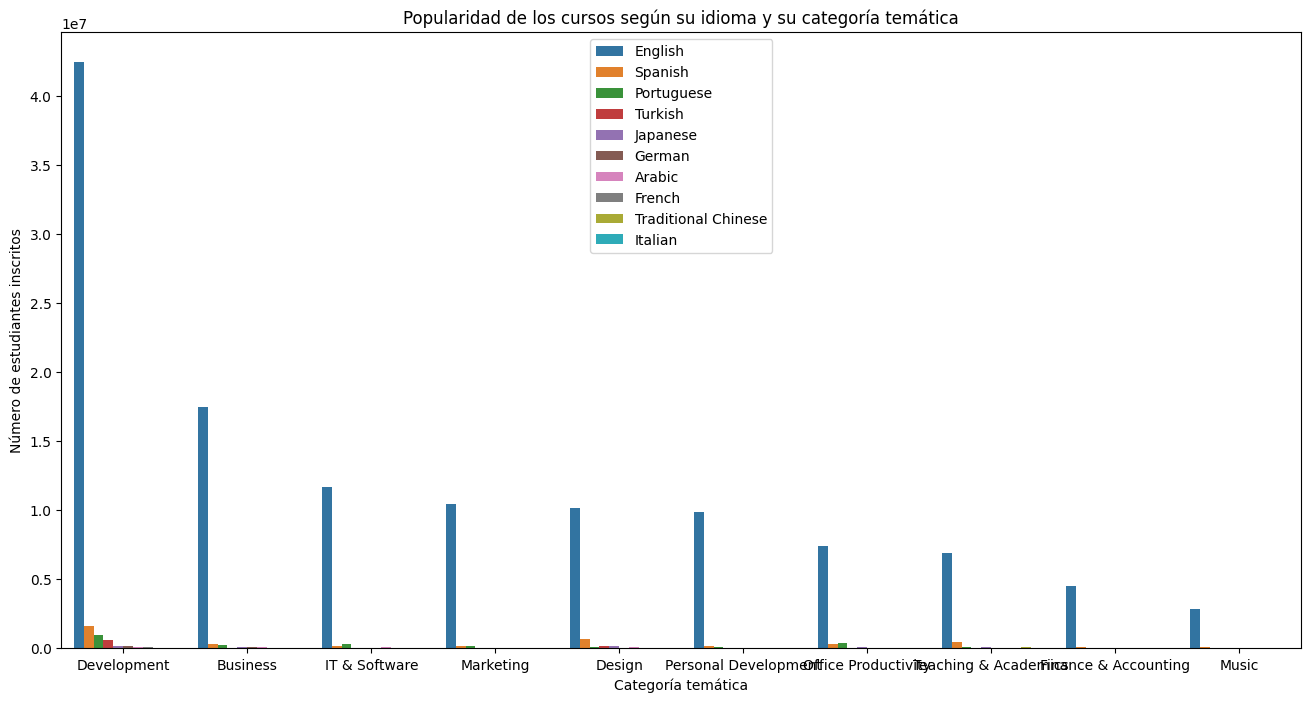

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='category', y='num_subscribers', hue='language', data=popularidad_por_idioma_categoria)
plt.title('Popularidad de los cursos según su idioma y su categoría temática')
plt.xlabel('Categoría temática')
plt.ylabel('Número de estudiantes inscritos')
plt.legend()
plt.show()

Por lo tanto, mediante la visualización, podemos inferir que en la categoría con mayor popularidad; Development, el idioma que predomina es el inglés, seguido luego por el portugués y el español. En las siguientes categorías podemos observar que, entre el idioma inglés, y los demás 9 idiomas más populares, hay una diferencia muy significativa, siendo el inglés el idioma que predomina por excelencia en dichos cursos. 

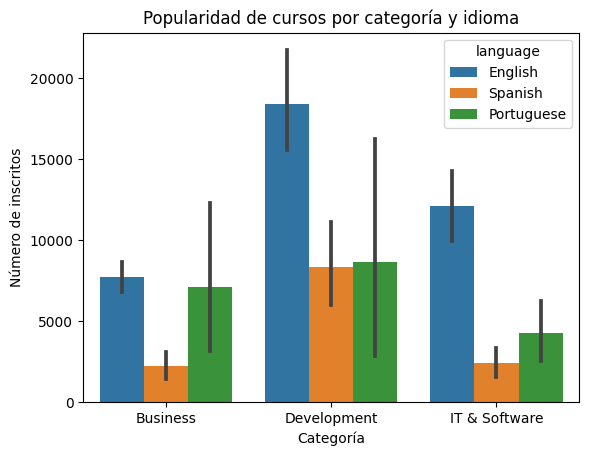

In [ ]:
categorias = ['Development', 'Business', 'IT & Software']
data_filtrada = data_udemy[data_udemy['category'].isin(categorias)]

idiomas = ['English', 'Portuguese', 'Spanish']
data_filtrada = data_filtrada[data_filtrada['language'].isin(idiomas)]


sns.barplot(x='category', y='num_subscribers', hue='language', data=data_filtrada)
plt.title('Popularidad de cursos por categoría y idioma')
plt.xlabel('Categoría')
plt.ylabel('Número de inscritos')
plt.show()

Algunas posibles recomendaciones serian ofrecer más cursos en inglés en las categorías de Development e IT & Software, ya que son las categorías con mayor popularidad y el inglés es el idioma más utilizado en ellas.
Diversificar los cursos en español y portugués en la categoría de Development, ya que son los idiomas más populares en esta categoría, y ofrecer más cursos en estos idiomas en las categorías de Business e IT & Software.
Asi como, realizar campañas de marketing específicas para los idiomas menos populares en cada categoría, con el objetivo de aumentar la popularidad de los cursos en esos idiomas.